In [1]:
import requests
import os
import sys
import requests
import shutil
import urllib.parse
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON


def download_image(url, directory):
    """
    Download an image from the given URL and save it to the specified directory.

    Args:
        url (str): The URL of the image to download.
        directory (str): The directory to save the downloaded image.

    Returns:
        int: The status code of the HTTP request.

    """
    headers = {"User-Agent": "Mozilla/5.0"}
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)
    if request.status_code == 200:
        filename = os.path.join(directory, os.path.basename(url))  # Get filename from URL
        # Decode the URL encoded filename to get readable text
        filename = urllib.parse.unquote(filename)
        with open(filename, "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
    return request.status_code


def get_results(endpoint_url, query):
    """
    Execute a SPARQL query on the given endpoint URL and return the results.

    Args:
        endpoint_url (str): The URL of the SPARQL endpoint.
        query (str): The SPARQL query to execute.

    Returns:
        dict: The JSON-formatted results of the SPARQL query.

    """
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

# SPARQL query
query = """
SELECT DISTINCT ?patisserie ?patisserieLabel ?image {
  ?patisserie wdt:P31*/wdt:P279* wd:Q477248;
          wdt:P18 ?image.
 SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
LIMIT 100
"""

# Wikidata SPARQL endpoint
wikidata_endpoint = "https://query.wikidata.org/sparql"

array = []
results = get_results(wikidata_endpoint, query)

# Extract the patisserie and image URL from the results
for result in results["results"]["bindings"]:
    array.append(
        (
            result["patisserieLabel"]["value"],
            result["image"]["value"],
        )
    )

# Create a pandas dataframe from the array
dataframe = pd.DataFrame(array, columns=["patisserie", "image"])
dataframe = dataframe.astype(
    dtype={"patisserie": "<U200", "image": "<U200"}
)

# Create directory if it doesn't exist
image_directory = "images"
if not os.path.exists(image_directory):
    os.makedirs(image_directory)

# Download the images in the specified directory
dataframe.image.apply(lambda x: download_image(x, image_directory))

C:\Users\prore\AppData\Local\Temp\ipykernel_4844\611488540.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


0     200
1     200
2     200
3     200
4     200
     ... 
95    200
96    200
97    200
98    200
99    200
Name: image, Length: 100, dtype: int64

In [11]:
import os
import json
import exifread


def extract_exif(filename):
    """
    Extracts EXIF data from the given image file.

    Args:
        filename (str): The path to the image file.

    Returns:
        dict: A dictionary containing the extracted EXIF data.
    """
    with open(filename, 'rb') as f:
        tags = exifread.process_file(f)
        return {str(tag): str(tags[tag]) for tag in tags}


def save_exif_data(exif_data, patisserie_name, directory):
    """
    Saves the EXIF data to a JSON file.

    Args:
        exif_data (dict): The EXIF data to be saved.
        patisserie_name (str): The name of the patisserie.
        directory (str): The directory where the JSON file will be saved.
    """
    filepath = os.path.join(directory, f"{patisserie_name}.json")
    
    # Format the JSON structure with placeholders for metadata and tags
    formatted_data = {
        "exif": exif_data,
        "metadata": {},  # Placeholder for metadata
        "tags": {}  # Placeholder for tags
    }
    
    # Save the formatted data to a JSON file
    with open(filepath, 'w') as f:
        json.dump(formatted_data, f, indent=4)


# Define the path to the images folder and datas folder
images_path = "images"
datas_directory = "datas"

# Create directory to save datas
if not os.path.exists(datas_directory):
    os.makedirs(datas_directory)

# Iterate over each file in the folder
for filename in os.listdir(images_path):
    file_path = os.path.join(images_path, filename)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        # Get the patisserie name from the filename
        patisserie_name = os.path.splitext(filename)[0]
        
        # Extract EXIF data
        exif_data = extract_exif(file_path)
        
        # Save EXIF data
        save_exif_data(exif_data, patisserie_name, datas_directory)


PNG file does not have exif data.
Possibly corrupted field RecordingMode in MakerNote IFD
Possibly corrupted field RecordingMode in MakerNote IFD
Possibly corrupted field RecordingMode in MakerNote IFD
Possibly corrupted field RecordingMode in MakerNote IFD
Possibly corrupted field RecordingMode in MakerNote IFD
Possibly corrupted field RecordingMode in MakerNote IFD
Possibly corrupted field LightingType in MakerNote IFD
Possibly corrupted field MakernoteVersion in MakerNote IFD
Possibly corrupted field SoftwareRelease in MakerNote IFD
PNG file does not have exif data.
Possibly corrupted field Software in Image IFD
Possibly corrupted field ShotInfo in MakerNote IFD
Possibly corrupted field Tag 0x0001 in MakerNote IFD
PNG file does not have exif data.
Possibly corrupted field ISOSelection in MakerNote IFD
PNG file does not have exif data.


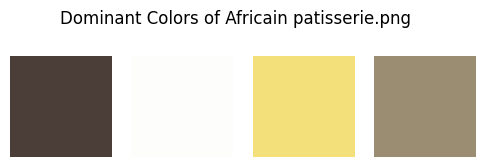

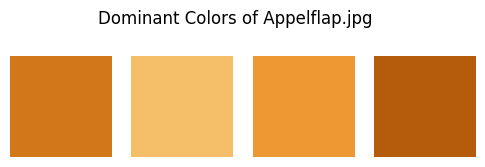

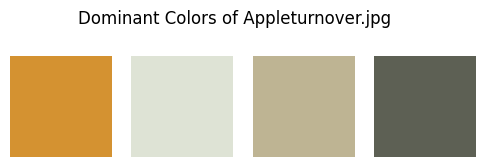

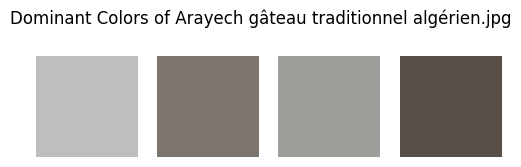

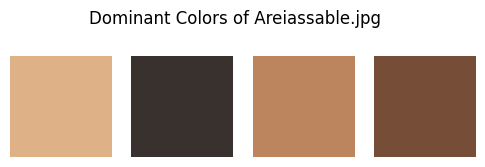

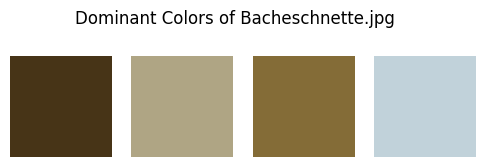

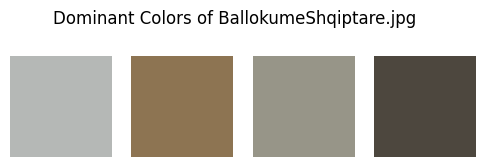

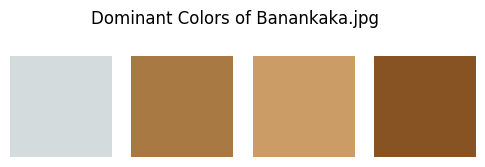

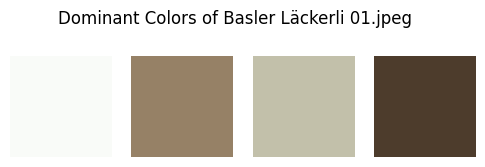

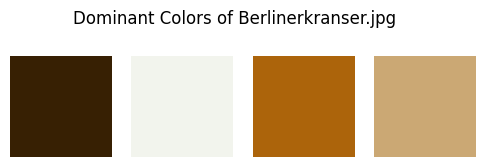

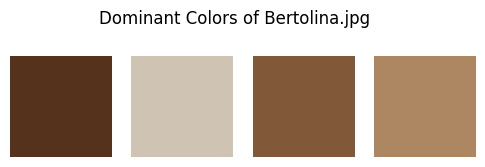

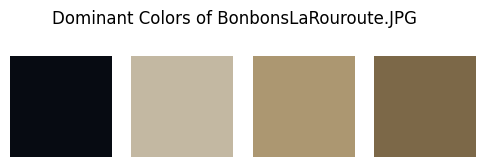

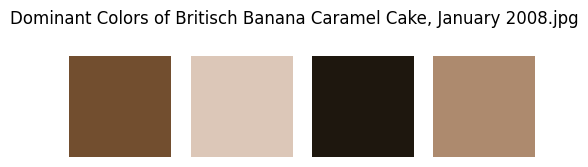

Error processing images\Bundesarchiv Bild 183-1990-0122-009, Dresden, Russisch-Brot- Herstellung.jpg: Expected 2D array, got 1D array instead:
array=[153. 171. 212. ... 250. 255. 255.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


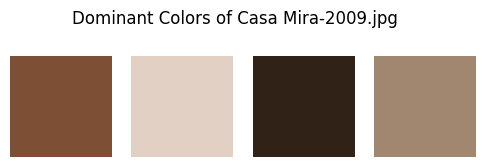

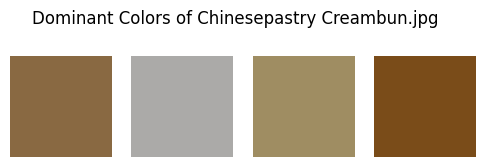

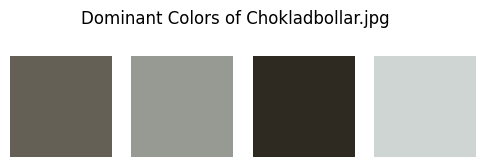

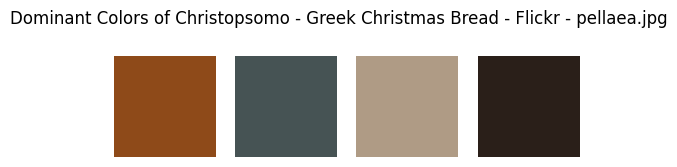

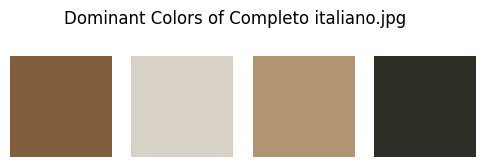

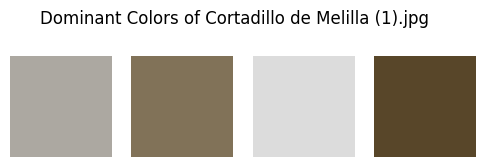

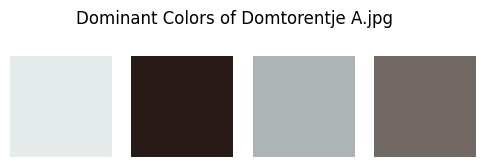

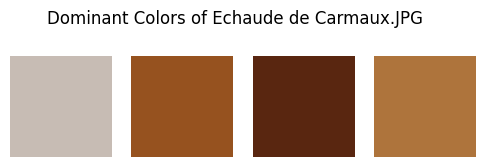

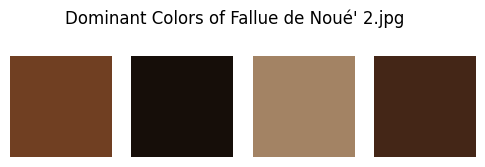

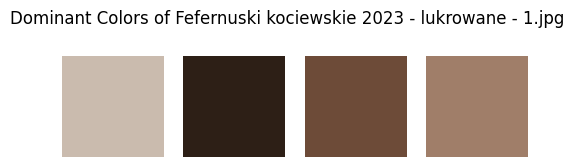

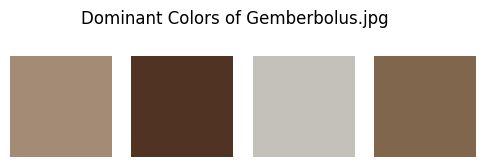

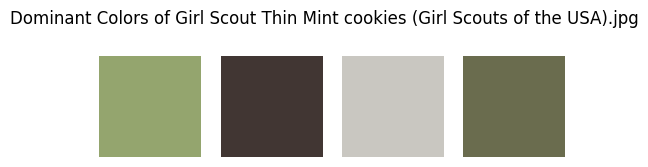

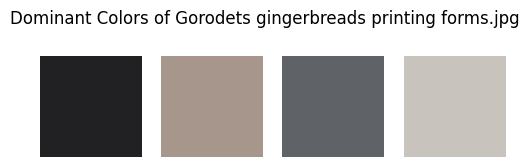

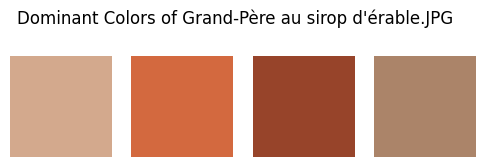

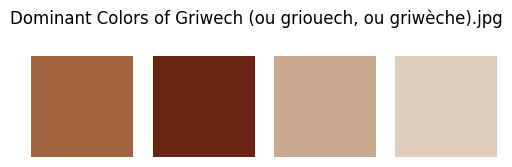

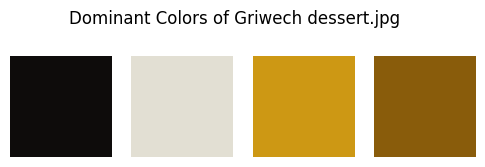

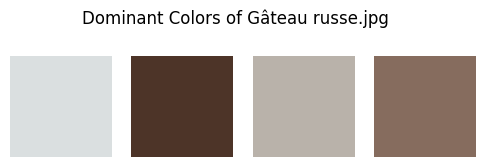

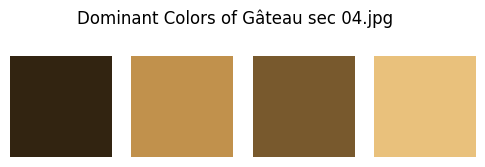

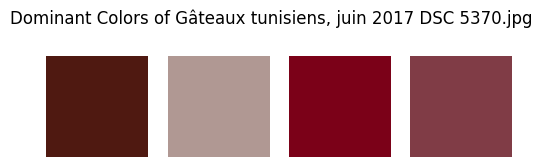

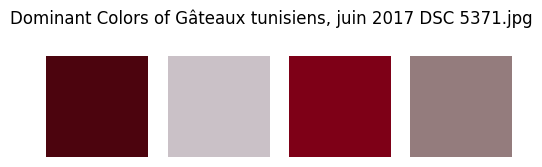

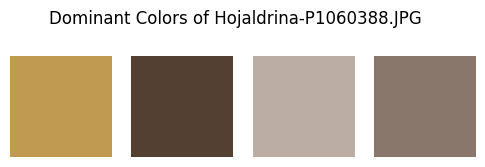

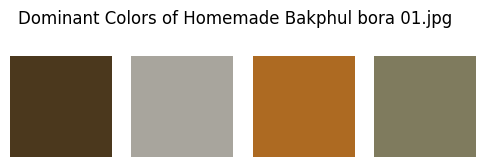

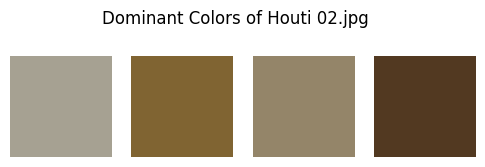

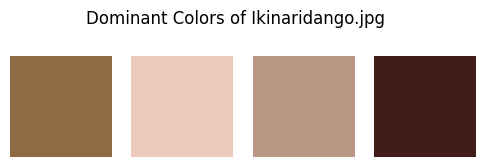

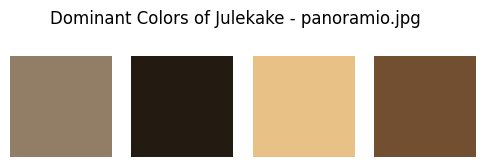

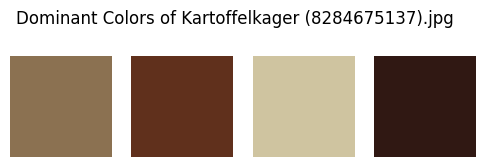

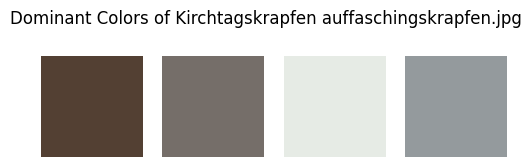

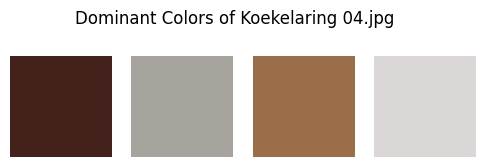

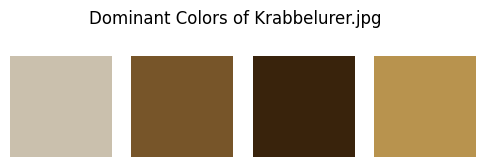

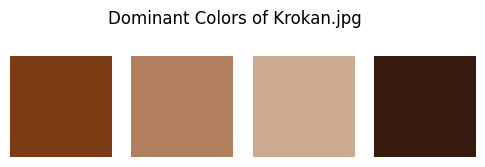

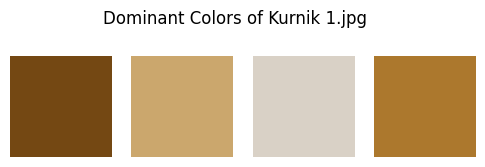

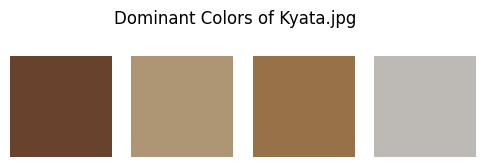

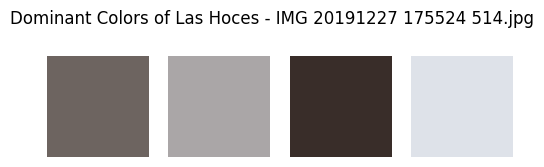

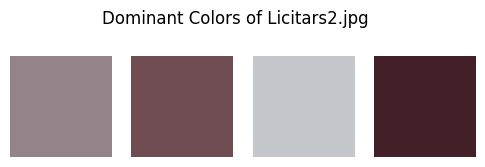

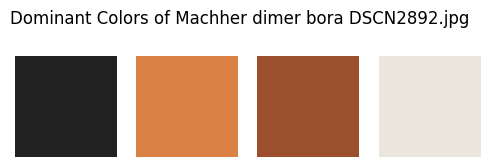

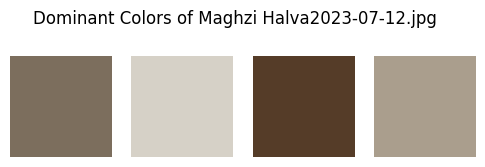

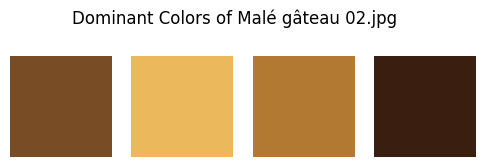

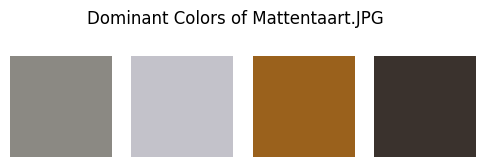

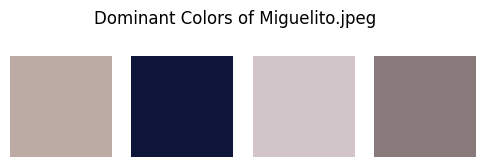

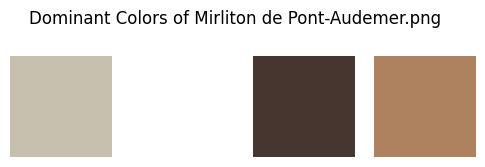

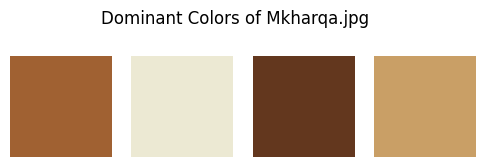

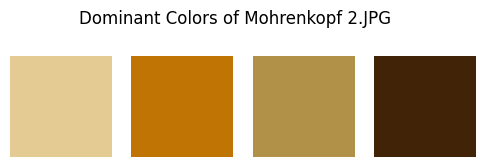

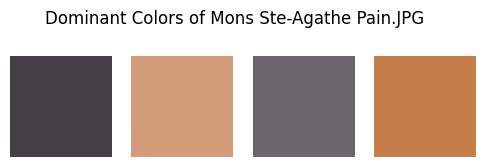

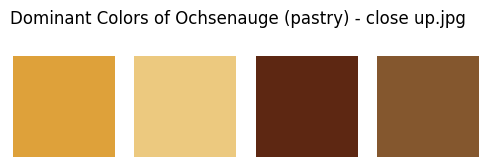

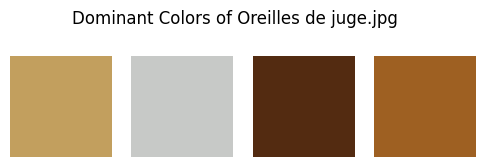

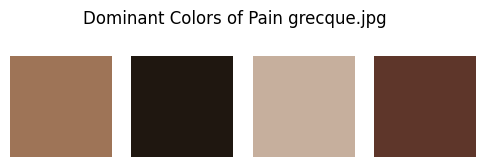

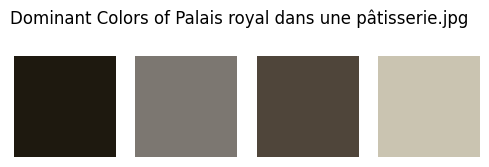

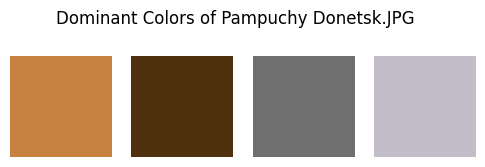

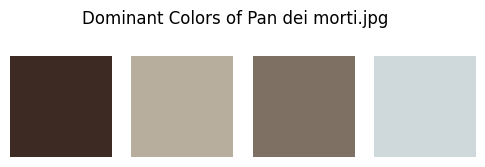

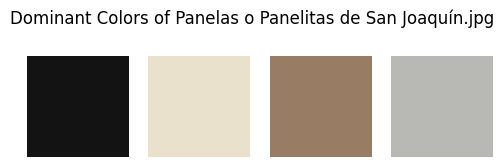

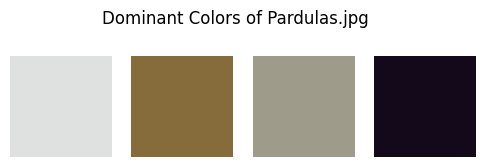

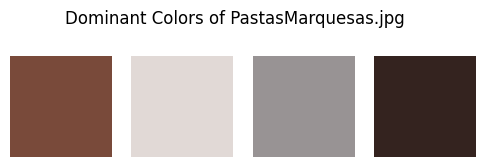

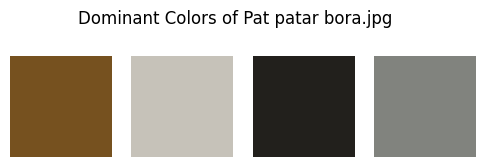

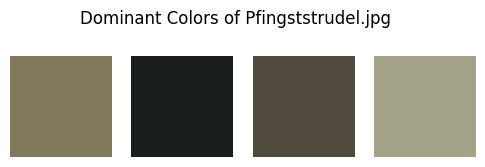

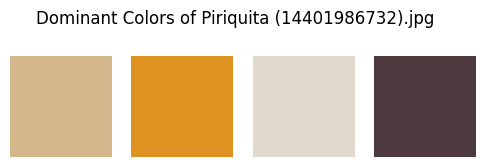

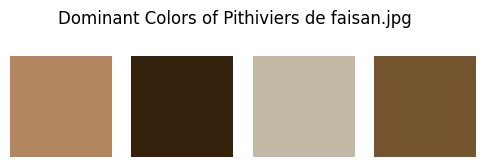

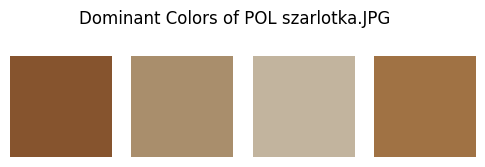

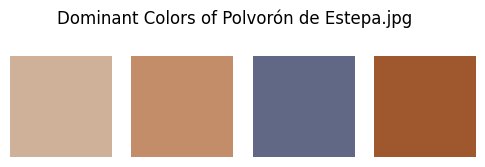

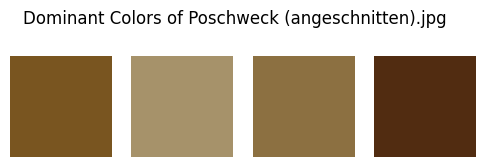

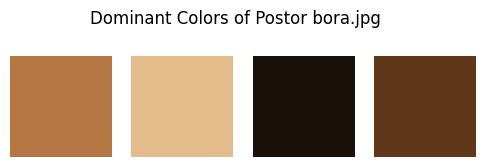

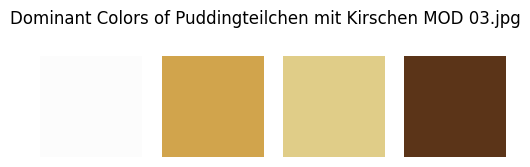

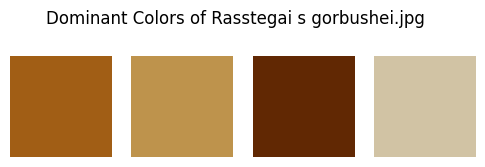

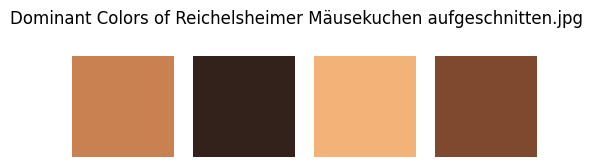

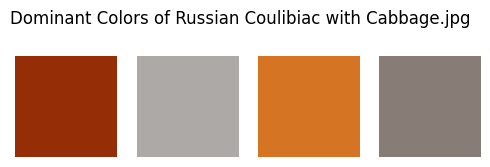

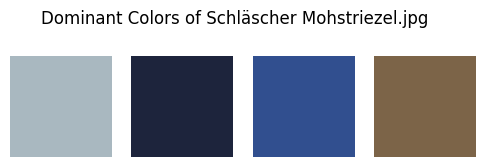

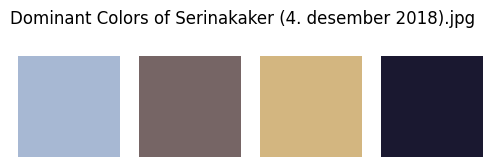

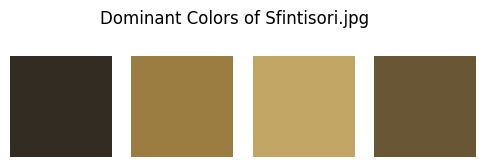

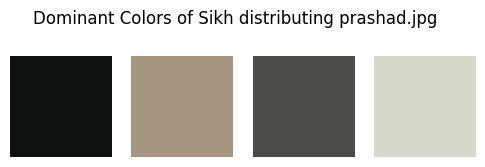

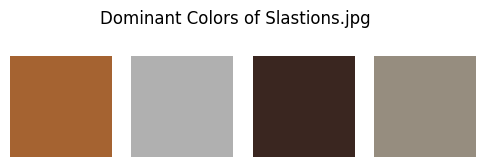

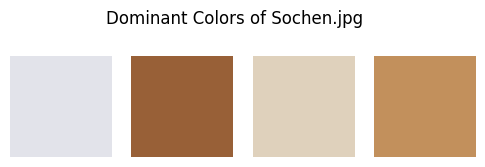

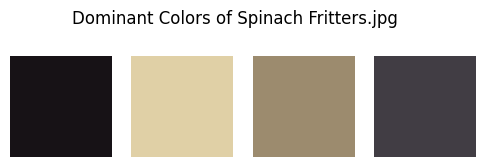

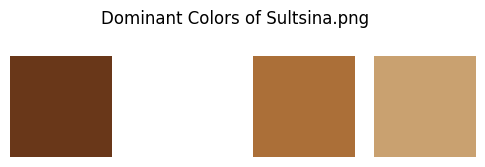

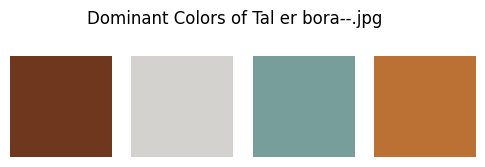

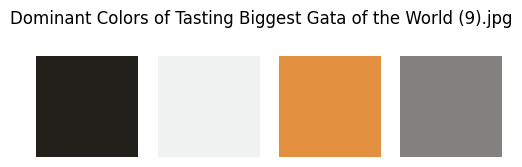

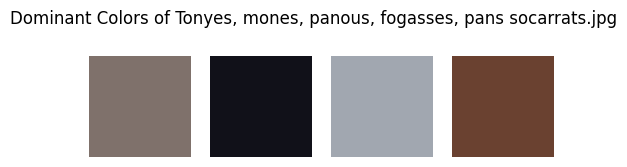

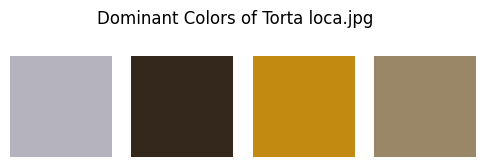

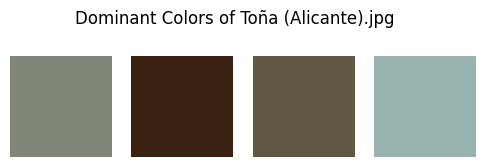

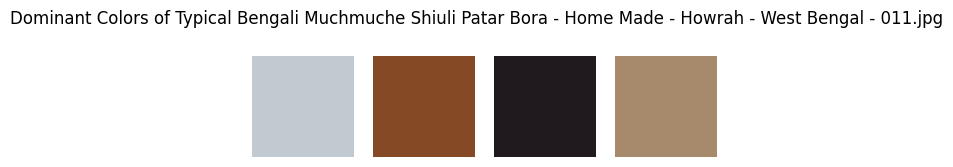

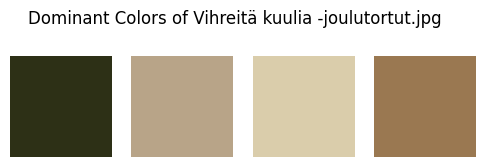

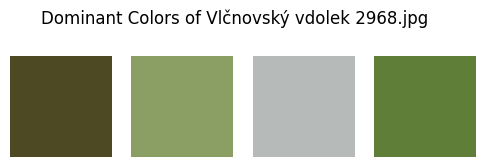

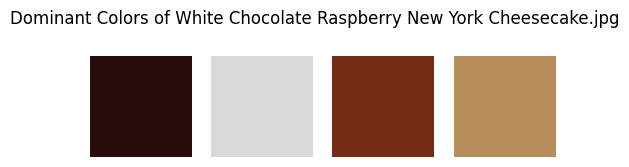

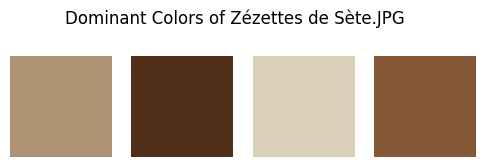

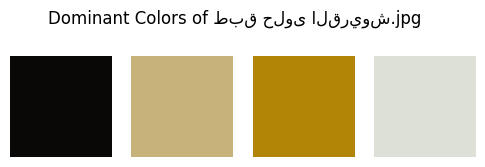

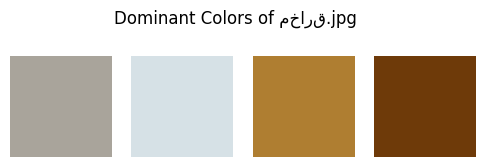

C:\Users\prore\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31866 (\N{CJK UNIFIED IDEOGRAPH-7C7A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


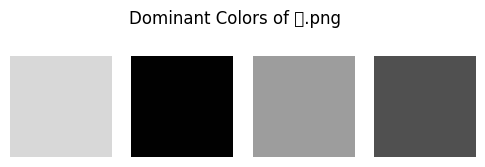

C:\Users\prore\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32511 (\N{CJK UNIFIED IDEOGRAPH-7EFF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\prore\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33590 (\N{CJK UNIFIED IDEOGRAPH-8336}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\prore\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20315 (\N{CJK UNIFIED IDEOGRAPH-4F5B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\prore\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39292 (\N{CJK UNIFIED IDEOGRAPH-997C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


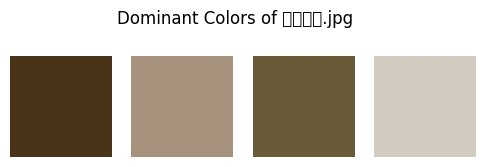

In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans


def extract_dominant_colors(image):
    """
    Extracts the dominant colors from an image using K-means clustering.

    Parameters:
    - image: PIL.Image object representing the input image.

    Returns:
    - dominant_colors: Array of RGB values representing the dominant colors in the image.
    """
    numarray = np.array(image.getdata(), dtype=np.uint8)
    clusters = KMeans(n_clusters=4, n_init=2)
    clusters.fit(numarray)
    return clusters.cluster_centers_

# Specify the path to the directory containing images
images_directory = "images"

# Iterate over each file in the images directory
for filename in os.listdir(images_directory):
    image_filename = os.path.join(images_directory, filename)
    # Check if the path is a file (not a directory)
    if os.path.isfile(image_filename):
        try:
            # Open the image
            image = Image.open(image_filename)
            # Extract dominant colors
            dominant_colors = extract_dominant_colors(image)

            # Plot dominant colors
            plt.figure(figsize=(6, 2))
            for i, color in enumerate(dominant_colors):
                plt.subplot(1, 4, i + 1)
                plt.imshow([[color / 255]])
                plt.axis('off')
            plt.suptitle(f"Dominant Colors of {filename}")
            plt.show()

        except Exception as e:
            print(f"Error processing {image_filename}: {e}")
